Exercitiul 1.

Problema Monty Hall este un exercitiu clasic de probabilitate si decizie care a fost inspirat de un joc de tip quiz din anii 1970, gazduit de Monty Hall. Problema este formulata astfel:

Avem trei uși. In spatele uneia dintre ele se află o masina (premiul cel mare), iar în spatele celorlalte doua usi se afla cate o capra (esecuri). Participantul alege o usa, dar nu o deschide imediat.
Gazda, care stie ce se afla în spatele fiecarei uși, deschide o usa care nu a fost aleasa de concurent si care are o capra in spate.

 Concursantul are acum optiunea de a ramane cu alegerea initiala sau de a schimba alegerea.

Intrebarea este "Care este strategia optima: ar trebui concurentul sa schimbe usa sau sa ramana cu prima alegere?"

In mod logic concurentul ar trebui sa schimbe decizia deoarece probabilitatea ca el sa ghiceasca din prima alegere este de 1/3 (numarul de usi), iar duap ce stie unde se afla o capra acesta va putea castiga masina cu o probabilitate de 2/3

Codul ce descrie problema:

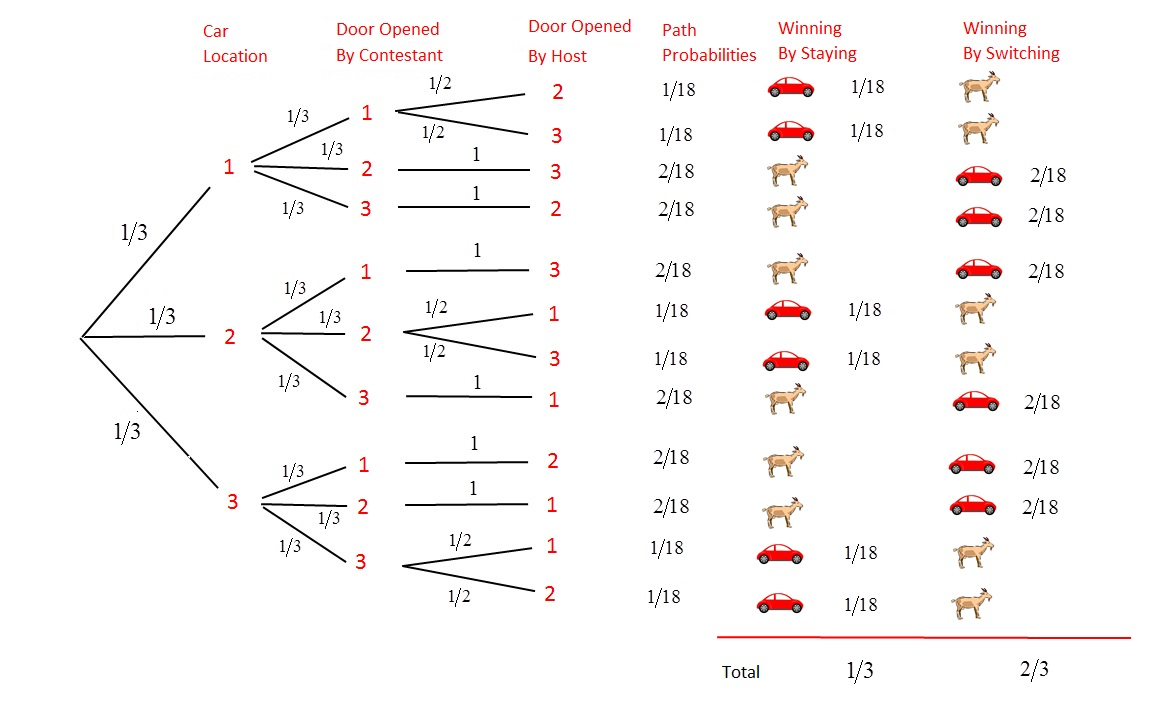

In [163]:
from IPython.display import Image
Image('./mh.jpg')

In [175]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import networkx as nx


#Aici, modelul defineste o retea bayesiana cu trei variabile:
#C (Usa aleasă de concurent)
#P (Usa cu premiul)
#H (Usa deschisa de gazda)
model = BayesianNetwork([("C", "H"), ("P", "H")])

# Se definesc probabilitatile a priori pentru variabilele C și P, fiecare avand o distributie uniforma (1/3 pentru fiecare usa).
cpd_c = TabularCPD("C", 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD("P", 3, [[0.33], [0.33], [0.33]])

#Acest CPD defineste probabilitatile pentru ușa deschisa de gazda (H), având în vedere usa aleasă de concurent (C)
#si ușa cu premiul (P). Valorile din matricea CPD-ului reflecta probabilitațile condiționate de diferitele combinatii ale alegerilor facute.
cpd_h = TabularCPD(
    "H",
    3,
    [
        [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
        [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
        [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0],
    ],
    evidence=["C", "P"],
    evidence_card=[3, 3],
)

# Acest pas asociaza CPD-urile definite anterior cu structura retelei bayesiene.
model.add_cpds(cpd_c, cpd_p, cpd_h)

model.get_cpds()
model.check_model()

#Aceasta utilizeaza algoritmul de eliminare a variabilelor pentru a efectua inferenta pe model. 
#Se calculeaza probabilitatea ca usa cu premiul (P) sa fie una dintre cele posibile, avand în vedere ca 
#concurentul a ales ușa 0 (C=0) și gazda a deschis ușa 2 (H=2). Rezultatul este afisat la final.
infer = VariableElimination(model)
posterior_p = infer.query(["P"], evidence={"C": 0, "H": 2})
print(posterior_p)

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.6667 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


Exercitiul 2.


True

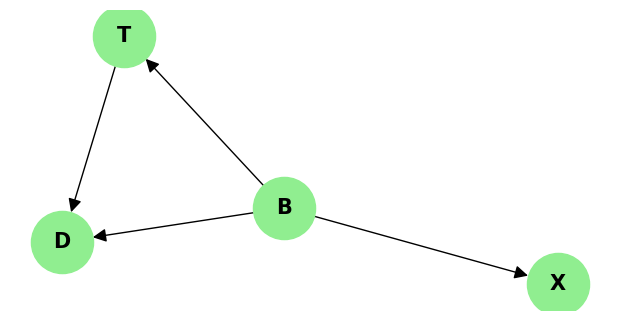

In [176]:

# Definirea modelului
model = BayesianNetwork([('B', 'T'), ('B', 'X'), ('B', 'D'), ('T', 'D')])


graph = nx.DiGraph()
graph.add_edges_from(model.edges())

plt.figure(figsize=(6, 3))
pos = nx.spring_layout(graph) 
nx.draw(graph, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightgreen', font_size=15, font_weight='bold', arrowsize=20)


#P(B=0)=0.9   P(B=1)=0.1
cpd_B = TabularCPD(variable='B', variable_card=2, values=[[0.9],[0.1]])

# P(T|B)
cpd_T = TabularCPD(variable='T', variable_card=2, values=[ [0.7, 0.2],
                                                           [0.3, 0.8]], 
                   evidence=['B'], evidence_card=[2])

# P(X|B)
cpd_X = TabularCPD(variable='X', variable_card=2,  values=[[0.1, 0.9], 
                                                           [0.9, 0.1]], 
                   evidence=['B'], evidence_card=[2])

# P(D|B, T)
cpd_D = TabularCPD(variable='D', variable_card=2, 
                   values=[ [0.9, 0.5, 0.6, 0.1],
                           [0.1, 0.5, 0.4, 0.9]], 
                   evidence=['B', 'T'], evidence_card=[2, 2])

model.add_cpds(cpd_B, cpd_T, cpd_X, cpd_D)
model.get_cpds()
model.check_model()


In [166]:
# P(B=1 | T=1, D=1)
infer=VariableElimination(model)
prob_B_given_symptoms = infer.query(variables=['B'], evidence={'T': 1, 'D': 1})
print(prob_B_given_symptoms)


+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.6522 |
+------+----------+
| B(1) |   0.3478 |
+------+----------+


In [167]:
prob_X_given_no_disease = infer.query(variables=['X'], evidence={'B': 0})
print(prob_X_given_no_disease)

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.1000 |
+------+----------+
| X(1) |   0.9000 |
+------+----------+


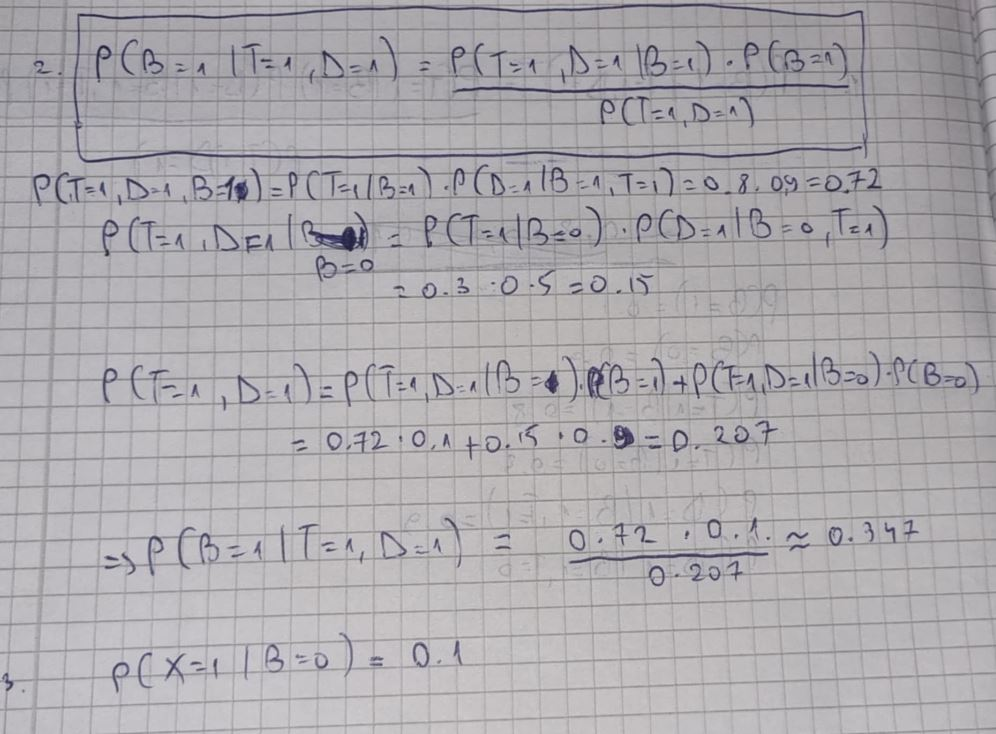

In [168]:


Image("./bonus.jpg")

--------------------EXERCITIUL 3---------------------

In [169]:
import random

def simulate_game():

    if random.random() < 0.5: 
        player0_starts = True
    else:
        player0_starts = False
    

    if player0_starts:
        n = random.randint(1, 6)  # J0 aruncă un zar normal
        m = sum(1 for _ in range(2 * n) if random.random() < 4/7)
    else:
        n = random.randint(1, 6)  # J1 aruncă un zar normal
        m = sum(1 for _ in range(2 * n) if random.random() < 0.5)  

    if player0_starts:
        return 0 if n >= m else 1
    else:
        return 1 if n >= m else 0  

def simulate_games(num_simulations):
    results = {0: 0, 1: 0} 
    for _ in range(num_simulations):
        winner = simulate_game()
        results[winner] += 1
    return results

num_simulations = 10000
results = simulate_games(num_simulations)

print(f"J0 câștigă: {results[0]} ({results[0] / 100}%)")
print(f"J1 câștigă: {results[1]} ({results[1] / 100}%)")


J0 câștigă: 4172 (41.72%)
J1 câștigă: 5828 (58.28%)


2.

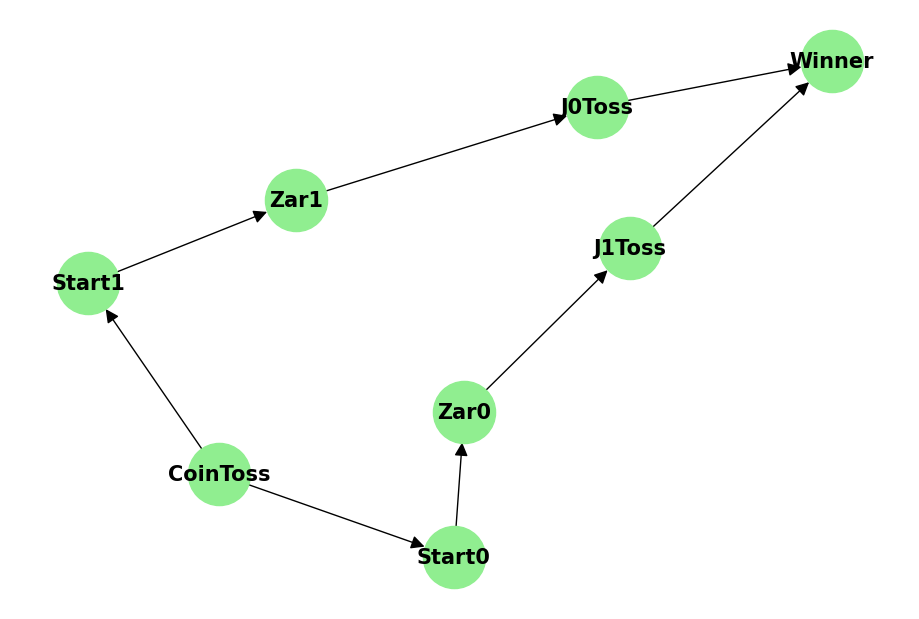

In [170]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

model = BayesianNetwork([
    ('CoinToss','Start0'),
    ('CoinToss','Start1'),
    ('Start0','Zar0'),
    ('Start1','Zar1'),
    ('Zar0','J1Toss'),
    ('Zar1','J0Toss'),
    ('J0Toss',"Winner"),
    ('J1Toss',"Winner")
])
graph = nx.DiGraph()
graph.add_edges_from(model.edges())

plt.figure(figsize=(9, 6))
pos = nx.spring_layout(graph) 
nx.draw(graph, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightgreen', font_size=15, font_weight='bold', arrowsize=20)


In [171]:
coin_toss_cpd = TabularCPD(variable='CoinToss', variable_card=2,
                           values=[[0.5], [0.5]])

start0_cpd = TabularCPD(variable='Start0', variable_card=2,
                        values=[[1, 0], [0, 1]],  
                        evidence=['CoinToss'],
                        evidence_card=[2])

start1_cpd = TabularCPD(variable='Start1', variable_card=2,
                        values=[[0, 1], [1, 0]], 
                        evidence=['CoinToss'],
                        evidence_card=[2])
zar0_cpd = TabularCPD(variable='Zar0', variable_card=6,
                      values=[[1/6],[1/6],[1/6],[1/6],[1/6],[1/6]])

zar1_cpd = TabularCPD(variable='Zar1', variable_card=6,
                      values=[[1/6],[1/6],[1/6],[1/6],[1/6],[1/6]])  